In [1]:
from sklearn import mixture
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

# for label map
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#import data
data1 = pd.read_csv('data_in/historical_seasonal.csv')
data2 = pd.read_csv('data_in/ssp126_seasonal.csv')
data3 = pd.read_csv('data_in/ssp585_seasonal.csv')
df = data1.append([data2,data3], ignore_index=True) #append data
df #data load

,x,y,season,1000,925,850,700,600,500,400,...,200,150,100,70,50,30,20,10,5,1
0,0.9375,-89.375,DJF,NaN,NaN,0.000000,0.099991,1.317870,1.275637,1.339549,...,4.697723,4.587994,5.397292,8.749182,12.559555,12.841137,9.390033,4.856805,2.673725,0.204272
1,0.9375,-89.375,JJA,NaN,NaN,0.000000,0.039306,1.683980,1.477666,1.281533,...,2.541174,5.368797,10.433466,16.512575,15.625815,9.196220,6.558020,2.781719,1.010234,0.169674
2,0.9375,-89.375,MAM,NaN,NaN,0.000000,0.038577,1.336666,1.227627,1.182483,...,4.361568,5.909919,9.756591,14.610302,15.168732,10.096333,6.584430,3.567123,1.779331,0.232079
3,0.9375,-89.375,SON,NaN,NaN,0.000000,0.074782,1.541470,1.391227,1.271945,...,2.324337,4.662927,4.703378,4.604415,5.159846,6.753445,6.899643,4.422953,2.297504,0.221742
4,2.8125,-89.375,DJF,NaN,NaN,0.000000,0.098728,1.317713,1.275441,1.339394,...,4.697357,4.587856,5.396471,8.748376,12.558534,12.841625,9.391102,4.857012,2.673738,0.204271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331768,357.1875,89.375,MAM,3.197045,3.143483,3.110951,3.141170,3.029033,2.807894,2.675290,...,12.147468,21.561138,26.759465,26.567406,22.772397,16.389281,12.865323,7.441234,3.977507,0.346113
331769,357.1875,89.375,SON,3.264681,3.206568,3.168741,3.109062,2.952354,2.708826,2.418583,...,6.246322,10.505812,13.739154,16.610936,16.521086,12.498409,8.821268,5.321466,3.065838,0.351077
331770,359.0625,89.375,DJF,3.053687,2.911132,2.790603,2.611595,2.489740,2.283158,2.044946,...,5.133944,10.372397,17.838699,21.718482,20.744612,15.345332,11.425738,6.518369,3.296892,0.278449
331771,359.0625,89.375,JJA,3.004739,3.343178,3.626347,3.869779,3.826420,3.700889,3.470816,...,11.679680,17.567568,16.079520,16.266056,16.099107,12.749317,9.638267,5.780284,3.564140,0.263063


In [3]:
# get the pressures on which the temperature readings are defined
pressures = data1.columns[5:].values

#for i in pressure:


# convert pressures to array of floats for plotting later
p = np.asarray([float(i) for i in pressures])

# get the latitudes, and longitudes for each profile#
#lon = df.iloc[:,0].values
#lat = df.iloc[0,:].values

# get the array that will be used to fit the GMM object
X = data1.iloc[:,5:].values

# number of profiles
nProfiles = X[:,1].size

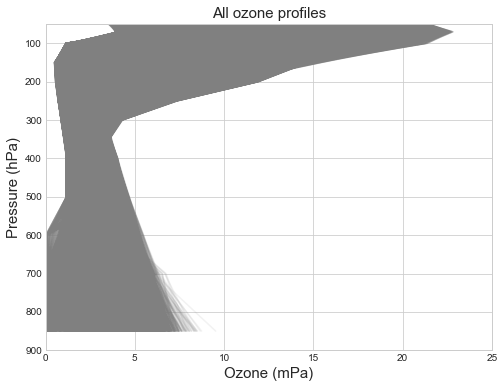

In [5]:
# In[3]: Plot all profiles


plt.figure(figsize=(8, 6))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
# Setting the background color
#ax.set_facecolor("grey")

for npr in range(nProfiles):
    plt.plot(X[npr,],p,alpha=0.1, color='gray')

plt.gca().invert_yaxis()
plt.ylim(900,50)
plt.xlim(0,25)
plt.xlabel('Ozone (mPa)', fontsize=15)
plt.ylabel('Pressure (hPa)', fontsize=15)
plt.title('All ozone profiles', fontsize=15)

plt.savefig("figures/profiles.pdf",bbox_inches="tight",transparent=False)          
#plt.show()